In [1]:
# Incident Reports inital exploration
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df_incidents = pd.read_excel("../data/Incidents (1-1-14 - 8-31-18).xlsx")
print(len(df_incidents))
df_incidents.head()

25826


,date,incident_number,incident_type,incident_call_type,cas_event_number,status,address,city,state,zip,...,num_people_deceased,num_adults,num_children,num_families,assistance_given,incident_verified,dispatch_relayed,responders_identified,dat_on_scene,dat_departed_scene
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,2014-01-01,14-0533,fire,hot,1-1F69GF,closed,1348 W HOWARD ST,CHICAGO,IL,60626.0,...,0.0,10.0,8.0,5.0,NaN,2014-01-01 07:00:00,2014-01-01 08:00:00,2014-01-01 08:08:00,2014-01-01 09:08:00,2014-01-02 01:45:00
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,2014-01-01,14-0534,police,hot,NaN,closed,604 SIBLEY AVE.,CALUMET CITY,IL,60409.0,...,0.0,1.0,0.0,1.0,NaN,2014-01-01 14:25:00,2014-01-01 14:30:00,2014-01-01 15:20:00,2014-01-01 16:00:00,2014-01-01 16:00:00
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [3]:
# Remove blank rows and only capture data on fires
df_incidents.dropna(how='all',inplace=True)
df_incidents.head()

,date,incident_number,incident_type,incident_call_type,cas_event_number,status,address,city,state,zip,...,num_people_deceased,num_adults,num_children,num_families,assistance_given,incident_verified,dispatch_relayed,responders_identified,dat_on_scene,dat_departed_scene
1,2014-01-01,14-0533,fire,hot,1-1F69GF,closed,1348 W HOWARD ST,CHICAGO,IL,60626.0,...,0.0,10.0,8.0,5.0,NaN,2014-01-01 07:00:00,2014-01-01 08:00:00,2014-01-01 08:08:00,2014-01-01 09:08:00,2014-01-02 01:45:00
3,2014-01-01,14-0534,police,hot,NaN,closed,604 SIBLEY AVE.,CALUMET CITY,IL,60409.0,...,0.0,1.0,0.0,1.0,NaN,2014-01-01 14:25:00,2014-01-01 14:30:00,2014-01-01 15:20:00,2014-01-01 16:00:00,2014-01-01 16:00:00
5,2014-01-01,14-0535,fire,hot,1-1F6ATB,closed,18405 REGAL ROAD,HOMEWOOD,IL,60430.0,...,0.0,4.0,0.0,1.0,NaN,2014-01-01 16:05:00,2014-01-01 16:20:00,2014-12-30 20:13:00,2014-01-01 17:30:00,2014-01-01 18:10:00
7,2014-01-01,14-0536,fire,hot,1-1F6ATV,closed,4323 SOUTH DEARBORN,CHICAGO,IL,60609.0,...,0.0,2.0,0.0,1.0,NaN,2014-01-01 21:10:00,2014-01-01 21:15:00,2014-01-01 21:50:00,2014-01-01 22:59:00,2014-01-01 23:51:00
9,2014-01-02,14-0537,fire,hot,1-1F6AT5,closed,1457 WOODBURY CIR,GURNEE,IL,60031.0,...,0.0,0.0,0.0,0.0,NaN,2014-01-02 07:40:00,2014-01-02 07:45:00,2014-01-02 08:10:00,2014-01-02 09:40:00,2014-01-02 22:15:00


In [4]:
# Filter to only fires
df_incidents = df_incidents[df_incidents['incident_type']=='fire']
df_incidents.drop('incident_type',axis=1,inplace=True)
df_incidents.head()

,date,incident_number,incident_call_type,cas_event_number,status,address,city,state,zip,county,...,num_people_deceased,num_adults,num_children,num_families,assistance_given,incident_verified,dispatch_relayed,responders_identified,dat_on_scene,dat_departed_scene
1,2014-01-01,14-0533,hot,1-1F69GF,closed,1348 W HOWARD ST,CHICAGO,IL,60626.0,Cook,...,0.0,10.0,8.0,5.0,NaN,2014-01-01 07:00:00,2014-01-01 08:00:00,2014-01-01 08:08:00,2014-01-01 09:08:00,2014-01-02 01:45:00
5,2014-01-01,14-0535,hot,1-1F6ATB,closed,18405 REGAL ROAD,HOMEWOOD,IL,60430.0,Cook,...,0.0,4.0,0.0,1.0,NaN,2014-01-01 16:05:00,2014-01-01 16:20:00,2014-12-30 20:13:00,2014-01-01 17:30:00,2014-01-01 18:10:00
7,2014-01-01,14-0536,hot,1-1F6ATV,closed,4323 SOUTH DEARBORN,CHICAGO,IL,60609.0,Cook,...,0.0,2.0,0.0,1.0,NaN,2014-01-01 21:10:00,2014-01-01 21:15:00,2014-01-01 21:50:00,2014-01-01 22:59:00,2014-01-01 23:51:00
9,2014-01-02,14-0537,hot,1-1F6AT5,closed,1457 WOODBURY CIR,GURNEE,IL,60031.0,Lake,...,0.0,0.0,0.0,0.0,NaN,2014-01-02 07:40:00,2014-01-02 07:45:00,2014-01-02 08:10:00,2014-01-02 09:40:00,2014-01-02 22:15:00
11,2014-01-02,14-0538,NaN,1-1F76M7,closed,4002 S BRIGHTON PL,CHICAGO,IL,60632.0,Cook,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [9]:
# Fill NaN Values
for cat in ['units_destroyed','units_major', 'units_minor', 'units_affected',
              'num_people_injured', 'num_people_hospitalized', 'num_people_deceased',
              'num_adults', 'num_children', 'num_families','assistance_given']:
    df_incidents[cat].fillna(0,inplace=True)
print(list(df_incidents.columns))
df_incidents.head()

121.0
55.0
10.0


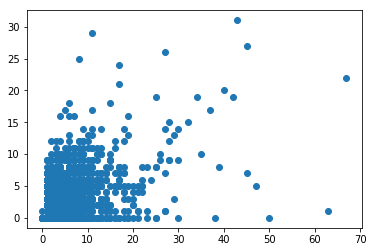

In [22]:
print(max(df_incidents['num_adults'].values))
print(max(df_incidents['num_children'].values))
print(max(df_incidents['num_people_deceased']))
plt.scatter(df_incidents['num_adults'],df_incidents['num_children']);

In [19]:
# Stat Functions
mean_f = lambda x: sum(x)/len(x)
std_f = lambda x: sum((x-mean_f(x))**2)/(len(x)-1)
zStat_f = lambda x: (x-mean_f(x))/std_f(x)
uStat_f = lambda x: x/(max(x)-min(x))

1        0.082645
5        0.033058
7        0.016529
9        0.000000
11       0.000000
13       0.000000
15       0.016529
17       0.000000
19       0.016529
21       0.000000
23       0.008264
25       0.000000
27       0.074380
29       0.000000
31       0.024793
33       0.107438
35       0.024793
37       0.000000
39       0.066116
41       0.082645
43       0.016529
45       0.066116
47       0.008264
49       0.016529
51       0.074380
55       0.008264
57       0.000000
59       0.016529
61       0.066116
63       0.016529
           ...   
25713    0.371901
25715    0.049587
25719    0.033058
25725    0.000000
25731    0.000000
25733    0.008264
25735    0.033058
25741    0.033058
25747    0.016529
25749    0.016529
25753    0.016529
25761    0.305785
25763    0.123967
25765    0.016529
25767    0.033058
25769    0.024793
25773    0.024793
25775    0.033058
25783    0.008264
25785    0.016529
25793    0.024793
25803    0.008264
25805    0.000000
25809    0.016529
25811    0